In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as sns
from sklearn.preprocessing import StandardScaler


In [28]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [30]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [36]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)


Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [38]:
# Calculate mean, median, mode, and standard deviation for multiple columns
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]  # mode can return multiple values, so we select the first one
std_dev_values = df[numerical_columns].std()

# Print the statistics
print("Mean for numerical columns:\n", mean_values)
print("\nMedian for numerical columns:\n", median_values)
print("\nMode for numerical columns:\n", mode_values)
print("\nStandard Deviation for numerical columns:\n", std_dev_values)


Mean for numerical columns:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median for numerical columns:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode for numerical columns:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Standard Deviation for numerical columns:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
d

<Axes: >

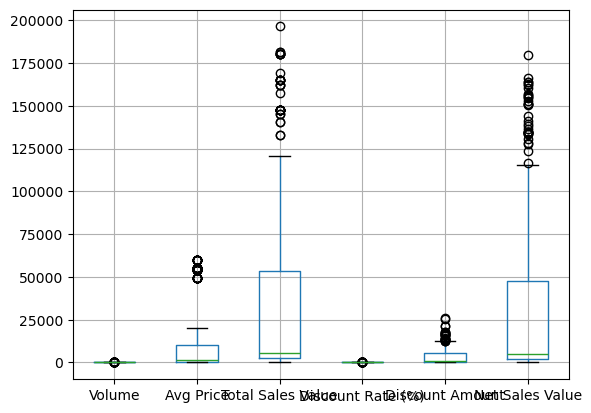

In [40]:
data.boxplot()

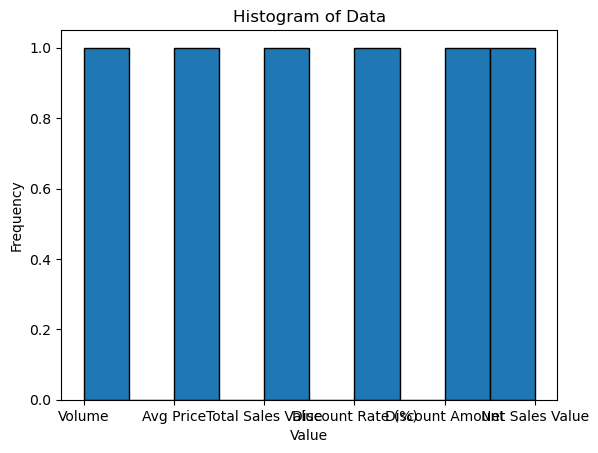

In [46]:
plt.hist(numerical_columns, bins=10, edgecolor='black')  # Adjust bins to control the number of bars

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the plot
plt.show()

In [48]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


C:\Users\datta\AppData\Local\Temp\ipykernel_7172\3078714963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(categorical_columns, palette='Set2')


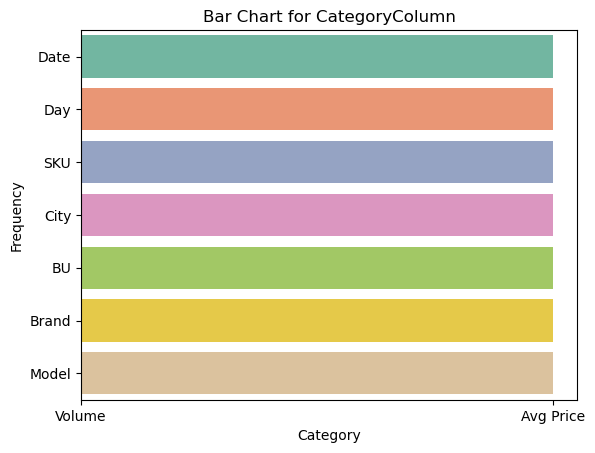

In [70]:
import seaborn as sns

sns.countplot(categorical_columns, palette='Set2')

# Add title and labels
plt.title('Bar Chart for CategoryColumn')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Show the plot
plt.show()

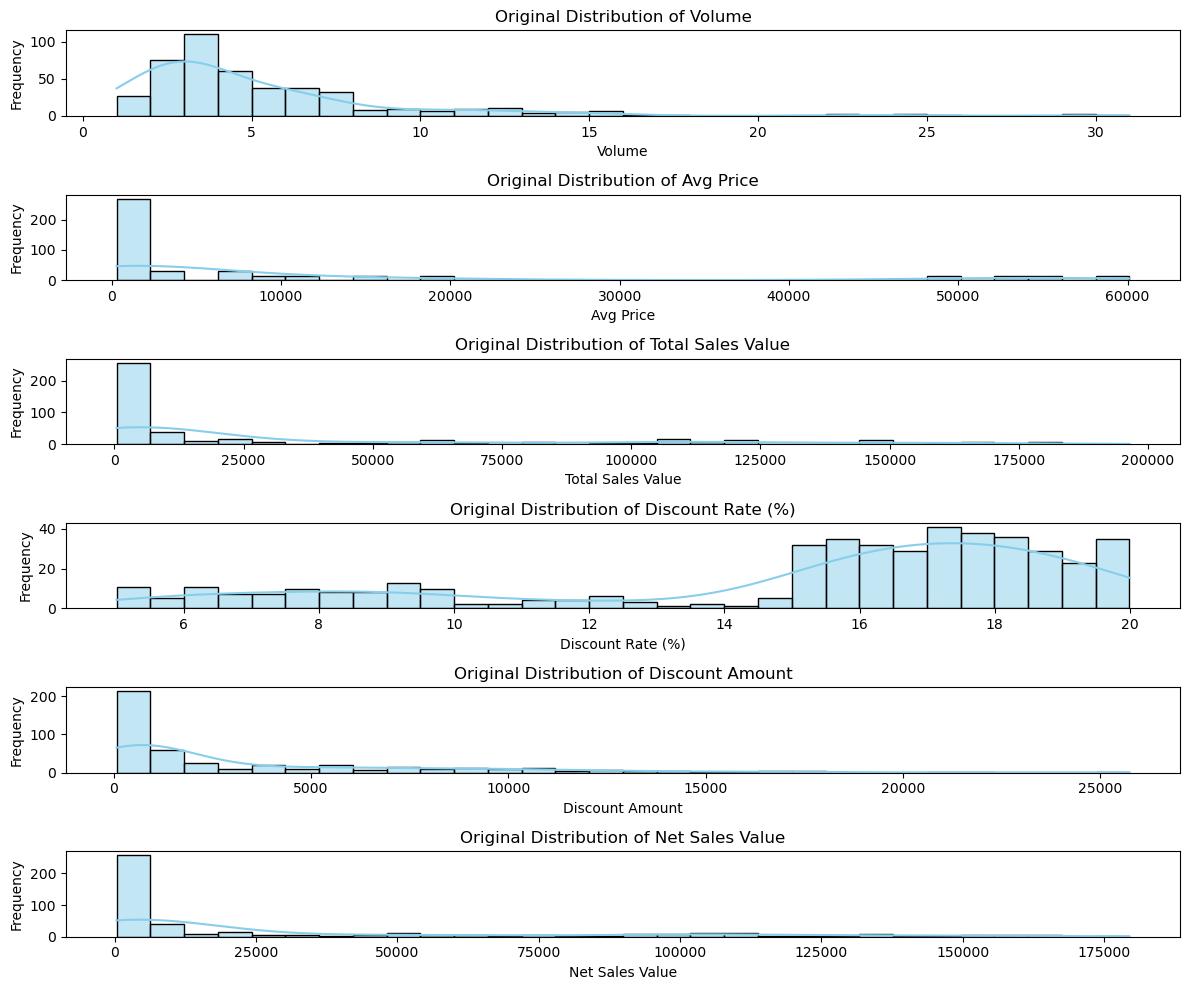

In [72]:
# Plot histograms for each numerical column before standardization
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Original Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [78]:
# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df_standardized = df.copy()  # Make a copy to preserve the original data
df_standardized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the first few rows of the standardized data
print(df_standardized.head())


         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  2.350029  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  1.167129  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.457388  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.220808  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C -0.488932  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.091173           2.925721          -0.830289         3.952816   
1  -0.019570           1.330995          -0.852661         1.849014   
2   0.312659           1.562775          -1.351631         1.622995   
3   0.534146           1.719276          -1.949723         1.113807   
4  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.22759

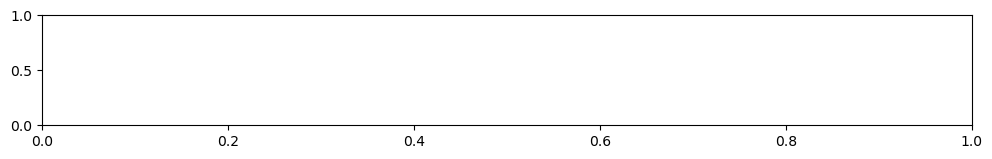

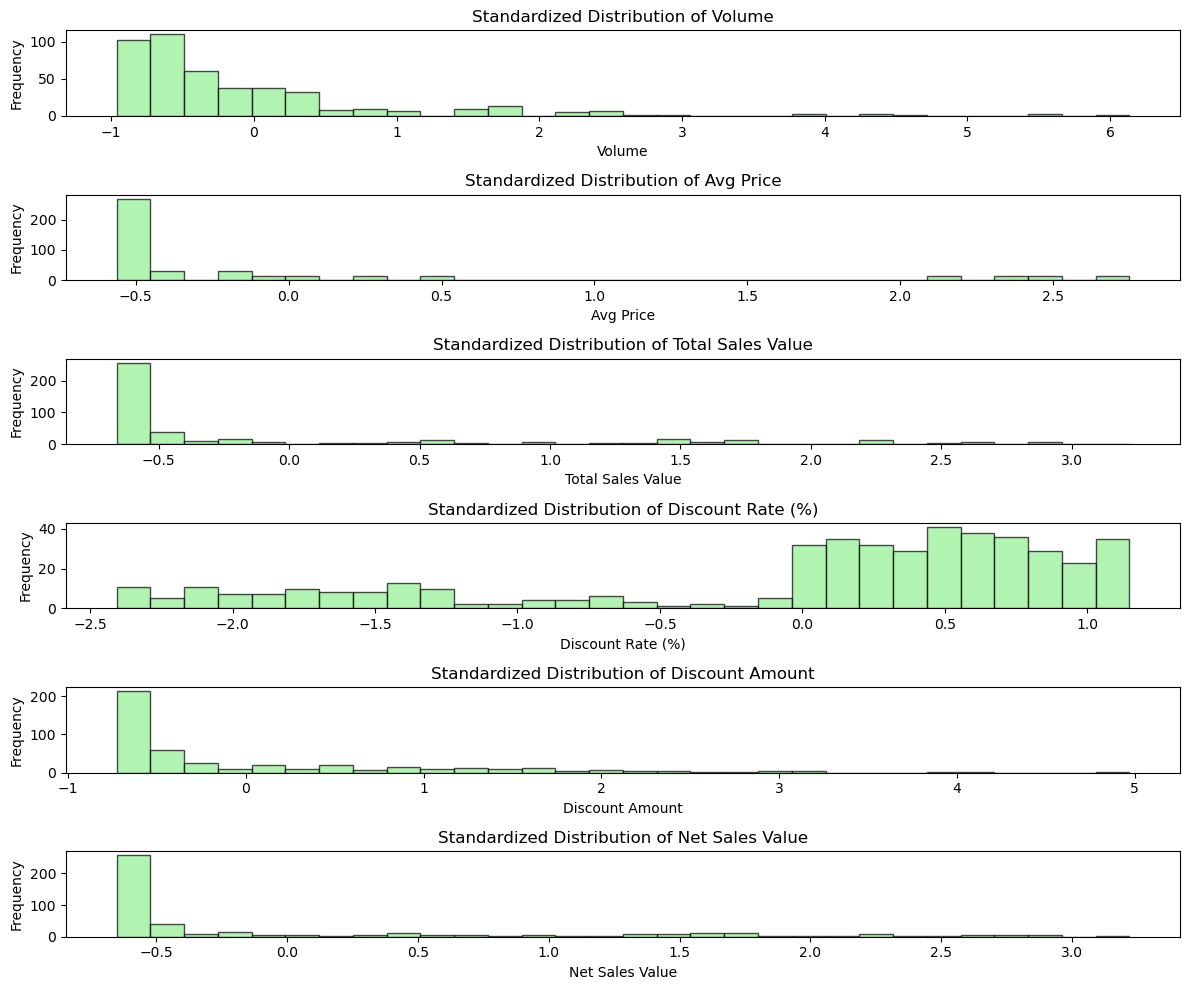

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    # Use plt.hist() to plot histograms
    plt.hist(df_standardized[col], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title(f"Standardized Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [84]:
import pandas as pd

# Example DataFrame (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Identify categorical columns (ensure you pick only the categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_columns}")

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Display a portion of the transformed dataset
print(df_encoded.head())


Categorical Columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False         

In [88]:
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...